# Importar librerías

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

import matplotlib.pyplot as plt

# Cargar datos

In [2]:
df = pd.read_csv("Recursos/05-clientes_clasificacion.csv")

df.head()

,edad,ingresos_mensuales,gasto_ultimo_mes,visitas_web,tickets_soporte,churn
0,56,1541082,309214,35,9,1
1,69,1290198,551108,23,8,0
2,46,998376,418501,14,9,0
3,32,998002,200159,28,9,1
4,60,1888015,222502,7,6,0


# Separar X e Y

In [3]:
X = df.drop("churn", axis=1)
y = df["churn"]

# Train / Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

# Crear el árbol

In [8]:
modelo_arbol = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

# Entrenar

In [9]:
modelo_arbol.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Predecir

In [12]:
y_pred = modelo_arbol.predict(X_test)

# Evaluar

In [13]:
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

print("Reporte:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6266666666666667
Reporte:
              precision    recall  f1-score   support

           0       0.66      0.80      0.73        46
           1       0.53      0.34      0.42        29

    accuracy                           0.63        75
   macro avg       0.59      0.57      0.57        75
weighted avg       0.61      0.63      0.61        75



# Visualizar el árbol

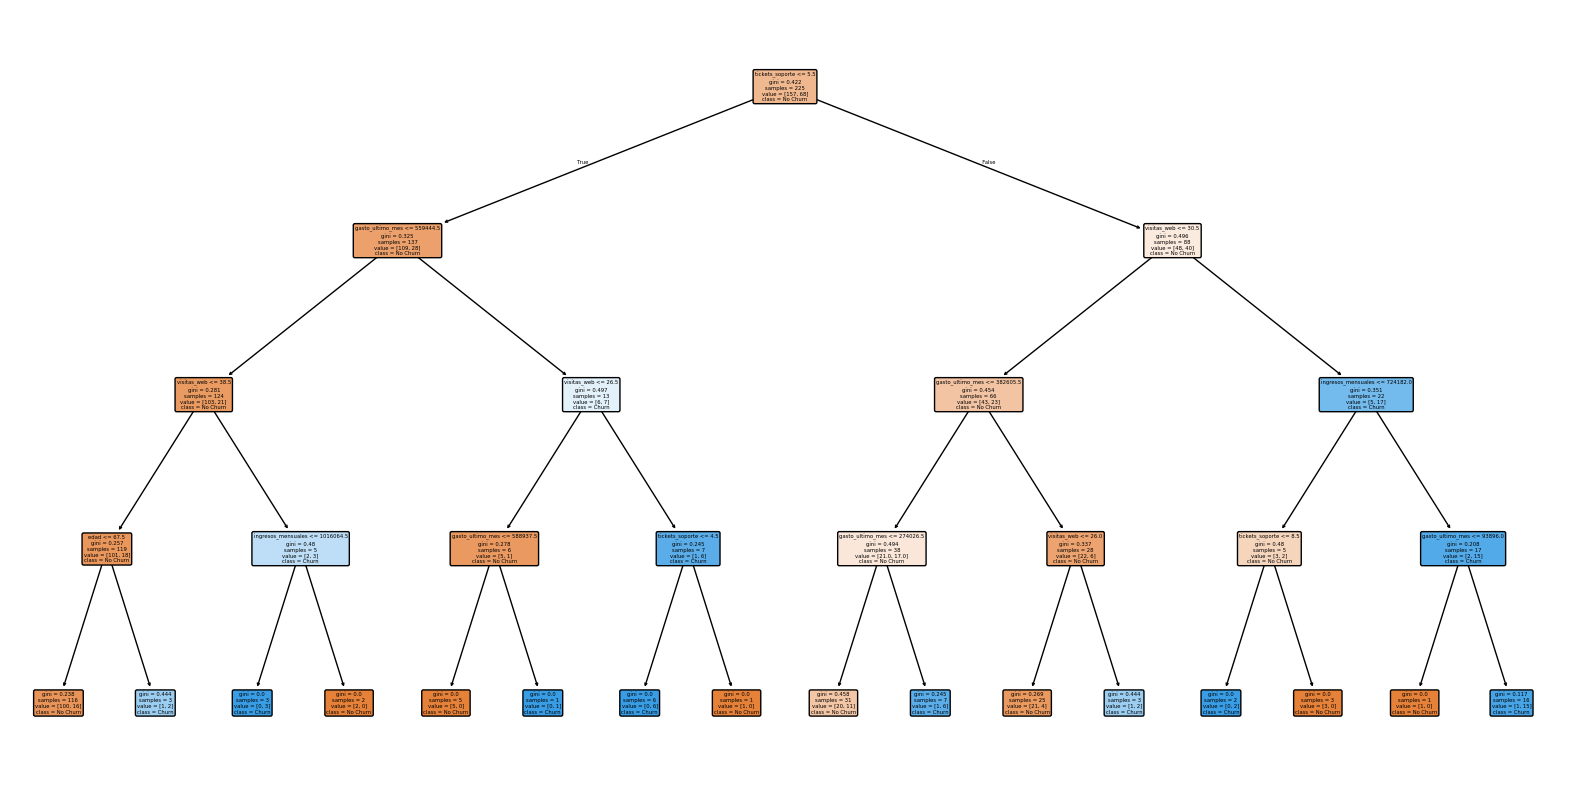

In [14]:
plt.figure(figsize=(20,10))

tree.plot_tree(
    modelo_arbol,
    feature_names=X.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True
)

plt.show()


## ¿Qué es esa imagen?

Es un árbol de decisión entrenado que nos ayudara a decidir:

👉 “¿Este cliente se va (Churn) o no?”

Cada cajita es una pregunta y cada rama es una decisión.

El modelo está jugando a “si pasa esto → entonces hago esto otro”, pero con matemáticas.

## Partes de cada caja (nodo)

- gastos_ultimos <= 53.2 : ¿El gasto del cliente es menor o igual a 53.2?
- gini = 0.42 : Mide qué tan “mezclados” están los datos, mientras más bajo → mejor nodo.
- samples = 120 : 120 clientes llegaron hasta aquí, mientras más muestras → más confiable.
- value = [80, 40] : Cuántos hay por clase, 80 no se van y 40 sí se van
- class = No Churn : Decisión final del nodo

### Respuesta:

✅ Sí → va a la izquierda

❌ No → va a la derecha

## Colores

🟦 Azul → No Churn

🟧 Naranjo → Churn

👉 Oscuro = “no tengo dudas”
👉 Clarito = “mmm… más o menos”

---------------------------------------------------
# Overfitting
* Árbol sin límite

In [15]:
modelo_sin_freno = DecisionTreeClassifier(random_state=42)

modelo_sin_freno.fit(X_train, y_train)

y_pred2 = modelo_sin_freno.predict(X_test)

print("Accuracy sin límite:", accuracy_score(y_test, y_pred2))

Accuracy sin límite: 0.6


# Importancia de variables

In [16]:
importancia = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": modelo_arbol.feature_importances_
})

importancia.sort_values("Importancia", ascending=False)

,Variable,Importancia
3,visitas_web,0.307102
2,gasto_ultimo_mes,0.278025
4,tickets_soporte,0.269566
1,ingresos_mensuales,0.104575
0,edad,0.040732
